In [1]:
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler



## Entropia y ganancia de informacion

In [2]:

# Creamos un diccionario con los datos
dataset = {
    'Pronostico': ['Soleado', 'Soleado', 'Nublado', 'LLuvia', 'LLuvia','Lluvia','Nublado', 'Soleado', 'Soleado','LLuvia', 'Soleado', 'Nublado', 'Nublado','LLuvia'],
    'Juego' : ['No','No','Si','Si','Si','No','Si','No','Si','Si','Si','Si','Si','No'],
    'Humedad': ['Alta','Alta','Baja','Alta','Alta','Alta','Baja','Baja','Alta','Alta','Baja','Baja','Baja','Baja']
}

# Creamos un DataFrame a partir del diccionario
df = pd.DataFrame(dataset)

# Imprimimos el dataset
print(df)


   Pronostico Juego Humedad
0     Soleado    No    Alta
1     Soleado    No    Alta
2     Nublado    Si    Baja
3      LLuvia    Si    Alta
4      LLuvia    Si    Alta
5      Lluvia    No    Alta
6     Nublado    Si    Baja
7     Soleado    No    Baja
8     Soleado    Si    Alta
9      LLuvia    Si    Alta
10    Soleado    Si    Baja
11    Nublado    Si    Baja
12    Nublado    Si    Baja
13     LLuvia    No    Baja


In [3]:
# Calculo de la entropia

num_si = 0

for i in df['Juego']:
  if i == 'Si' :
    num_si += 1

print("Entropia es", -1* ((num_si/14)*(math.log2(num_si/14))) - (((14-num_si)/14) * (math.log2(((14-num_si)/14)))  ))


# Calculo de todas las entropias
# Reto calcular todas las entropias 

# Calculo de la ganancia de informacion

print("Ganancia es ", (0.94) - (7/14)*(0.985) - (7/14)*(0.592)) # 0.985 es la entropia cuando la humedad es alta, y 0.592 cuando es normal

Entropia es 0.9402859586706311
Ganancia es  0.15149999999999997


# Arboles de decision

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [5]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42,criterion = "entropy")
tree_clf.fit(X, y)

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


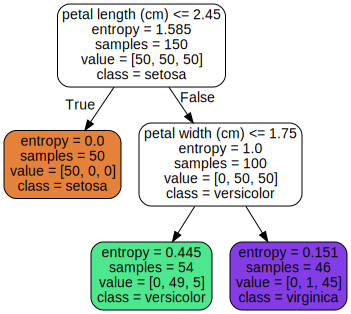

In [6]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os
export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))



In [7]:
# Realizar prediccion

print(tree_clf.predict( [[5,1.5]] )) # Versicolor

# Realizar probabilidad de prediccion

print(tree_clf.predict_proba( [[5,1.5]])) # Setosa - Versicolor - Virginica

[1]
[[0.         0.90740741 0.09259259]]


# OverFitting

Saving figure min_samples_leaf_plot


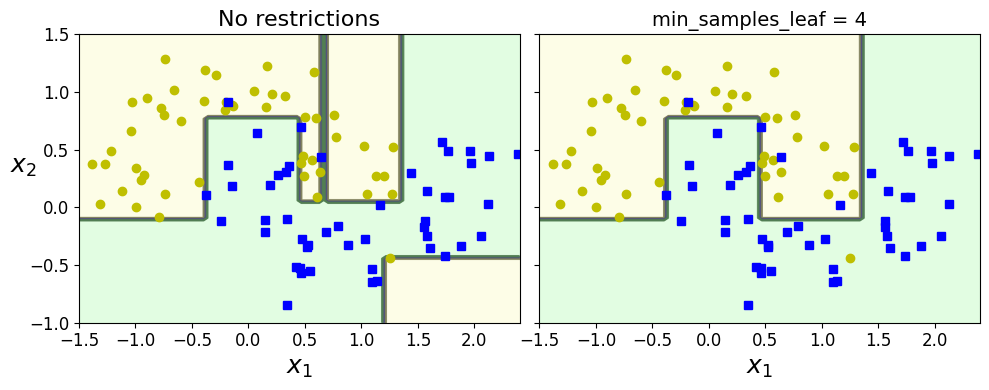

In [8]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42) # No control de Hiperparametros

deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42) # Control de hiperparametros

deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)


# Graficacion de predicciones
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()


## CART Algorithm



In [9]:
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.left = None
        self.right = None
        self.feature_index = 0
        self.threshold = 0

class PJ_Cart_Tree:
    def __init__(self, max_depth, acceptable_impurity):
        self.max_depth = max_depth
        self.acceptable_impurity = acceptable_impurity
        
    def predict(self, inputs):
        current_node = self.tree
        while current_node.left:
            if inputs[current_node.feature_index] < current_node.threshold:
                current_node = current_node.left
            else:
                current_node = current_node.right
        return current_node.predicted_class
        
    def fit(self, x, y):
        self.classifications = len(set(y))
        self.features = x.shape[1]
        self.tree = self.create_tree(x, y)
        
    def gini_impurity(y):
        instances = np.bincount(y)
        total = np.sum(instances)
        p = instances/total
        return 1.0 - np.sum(np.power(p,2)) 
        
    def cart_split(self, x, y):
        m = y.size
        if m <= 1:
            return None, None
        best_index = None
        best_threshold = None
        parent = [np.sum(y == c) for c in range(self.classifications)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in parent)

        if best_gini >= self.acceptable_impurity:
            for index in range(self.features):
                thresholds, classes = zip(*sorted(zip(x[:, index], y)))
                num_left = [0] * self.classifications
                num_right = parent.copy()
                for i in range(1, m):
                    c = classes[i - 1]
                    num_left[c] += 1
                    num_right[c] -= 1
                    gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.classifications))
                    gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.classifications))
                    gini = (i * gini_left + (m - i) * gini_right) / m
                    if thresholds[i] == thresholds[i - 1]:
                        continue
                    if gini < best_gini:
                        best_gini = gini
                        best_index = index
                        best_threshold = (thresholds[i] + thresholds[i - 1]) / 2
        return best_index, best_threshold
    
    def create_tree(self, x, y, depth=0):
        samples_class = [np.sum(y == i) for i in range(self.classifications)]
        predicted_class = np.argmax(samples_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            index, thr = self.cart_split(x, y)
            if index is not None:
                indices_left = x[:, index] < thr
                x_left = x[indices_left]
                y_left = y[indices_left]
                x_right = x[~indices_left]
                y_right = y[~indices_left]
                node.feature_index = index
                node.threshold = thr
                node.left = self.create_tree(x_left, y_left, depth + 1)
                node.right = self.create_tree(x_right, y_right, depth + 1)
        return node

tree = PJ_Cart_Tree(max_depth=4, acceptable_impurity=0.2)

tree.fit(iris.data, iris.target)
cl = tree.predict(iris.data[80])

print('Classified as {}'.format(iris.target_names[cl]))

Classified as versicolor


## Regresion con arboles de decision

In [10]:
# Importar las bibliotecas necesarias
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos de precios de viviendas de California
data = fetch_california_housing()

# Dividir los datos en características (X) y etiquetas (y)
X = data.data
y = data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

DecisionTreeRegressor()

In [11]:

# Realizar predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Calcular el error cuadrado medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrado medio:", mse)


Error cuadrado medio: 7.529341004289696e-32


In [12]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Realizar predicciones en el conjunto de prueba
y_pred = tree_reg1.predict(X_test)

# Calcular el error cuadrado medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrado medio:", mse)



Error cuadrado medio: 0.7489775612502384


## Random Forest


In [25]:

from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

# Dividir los datos en características (X) y etiquetas (y)
X = breast_cancer.data
y = breast_cancer.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un solo árbol de decisión
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Realizar predicciones utilizando el árbol de decisión
y_pred_tree = decision_tree.predict(X_test)




In [14]:
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [26]:
# Exportar la representación gráfica del árbol de decisión
export_graphviz(
    tree_clf,
    out_file=os.path.join("/content/", "tree2.dot"),
    feature_names=breast_cancer.feature_names,
    class_names=breast_cancer.target_names,
    rounded=True,
    filled=True
)

# Cargar el archivo .dot y visualizar el árbol
path_to_dot_file = os.path.join("/content/", "tree2.dot")
src = Source.from_file(path_to_dot_file)
src.view()

'/content/tree2.dot.pdf'

In [30]:

from sklearn.ensemble import RandomForestClassifier


# Crear y entrenar un Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)

# Realizar predicciones utilizando el Random Forest
y_pred_forest = random_forest.predict(X_test)




In [33]:
## Visualizacion del arbol

# Seleccionar el árbol individual a visualizar (por ejemplo, el primer árbol)
tree_to_visualize = random_forest.estimators_[0]

# Exportar la representación gráfica del árbol seleccionado
export_graphviz(
    tree_to_visualize,
    out_file=os.path.join("/content/", "random_forest_tree.dot"),
    feature_names=breast_cancer.feature_names,
    class_names=breast_cancer.target_names,
    rounded=True,
    filled=True
)

# Cargar el archivo .dot y visualizar el árbol
path_to_dot_file = os.path.join("/content/", "random_forest_tree.dot")
src = Source.from_file(path_to_dot_file)
src.view()


'/content/random_forest_tree.dot.pdf'

In [31]:
from sklearn.metrics import accuracy_score

# Calcular la precisión de cada modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_forest = accuracy_score(y_test, y_pred_forest)

print("Precisión del árbol de decisión:", accuracy_tree)
print("Precisión del Random Forest:", accuracy_forest)

Precisión del árbol de decisión: 0.9473684210526315
Precisión del Random Forest: 0.9649122807017544
